In [2]:
## Titanic 데이터 셋으로 딥러닝 학습을 시행해보자 

#필요한 모듈 불러오기
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import warnings 
from sklearn.linear_model import LogisticRegression 


warnings.filterwarnings(action = "ignore") # warning 출력 방지

train_df = pd.read_csv("./data/titanic/train.csv")

train_df.shape #(891, 12)

(891, 12)

In [3]:
#누적그래프 함수 만들기
def stackedBarChart(feature):
    survived = train_df.loc[train_df["Survived"]==1][feature].value_counts() 
    survived.name = "Survived"
    survived
 
    dead = train_df.loc[train_df["Survived"]==0][feature].value_counts()
    dead.name = "Dead"
    dead

    chart_df = pd.DataFrame([survived,dead])
    chart_df.plot(kind="bar", stacked=True) #누적 막대 그래프를 그리겠다고 선언 


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Jonkheer      1
Lady          1
Ms            1
Countess      1
Mme           1
Sir           1
Capt          1
Name: Title, dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,3
887,1,1,female,19.0,0,0,30.0000,S,1
888,0,3,female,NaN,1,2,23.4500,S,1
889,1,1,male,26.0,0,0,30.0000,C,0


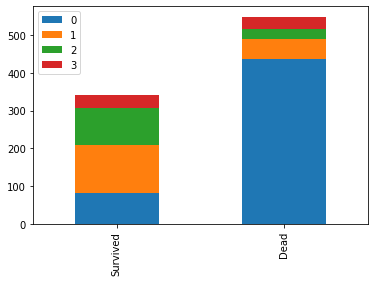

In [4]:
# Feature Engineering
# 1. Name 
# + 사용할 feature/ 사용하지 않을 feature 구분 
train_df["Title"]= train_df["Name"].str.extract("([A-Za-z]+)\.") #영문자, 대소문자 한 다음에 . 이 나오는 형태만 뽑아라
                                              # (Mr. Mrs. Miss. Rev. ...)
print(train_df["Title"].value_counts()) #Title 컬럼에 대해서 몇 개 있는지 출력 
#Title안에 Mr. Miss Mrs. Other를 각각 0,1,2,3으로 변환 (Series의 map 이용)
title_mapping_dict = {"Mr" : 0, "Miss":1, "Mrs":2,
                      "Master" :3, "Dr" :3, "Rev" :3,
                      "Col" :3, "Major" :3, "Mlle" :3,
                      "Don" :3, "Jonkheer" :3, "Countess" :3,
                      "Lady" :3, "Mme" :3, "Ms" :3,
                      "Sir" :3, "Capt" :3} #mapping되는 형태를 dict 형식으로 선언
train_df["Title"]=train_df["Title"].map(title_mapping_dict)
train_df #출력 확인(컬럼생성여부)
stackedBarChart("Title") # Mr. 가 압도적으로 많이 죽은것을 확인 

#제거할 건 제거하자(너무 결측치가 많거나 상관없어 보인다)
train_df.drop("Name", axis=1, inplace=True)
train_df.drop("Ticket", axis=1, inplace=True)
train_df.drop("Cabin", axis=1, inplace=True)
train_df.drop("PassengerId", axis=1, inplace=True)
#train_df.drop("Embarked", axis=1, inplace=True)
train_df

In [5]:
# 2. 성별  
sex_mapping_dict = {'male': 0, 'female':1}
train_df["Sex"]=train_df["Sex"].map(sex_mapping_dict)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,2,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,3
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,NaN,1,2,23.4500,0,1
889,1,1,0,26.0,0,0,30.0000,2,0


None

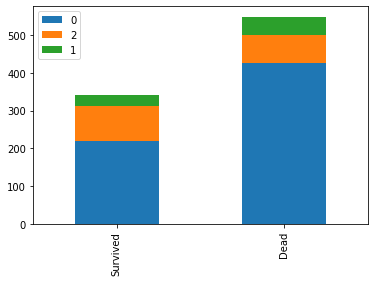

In [6]:
# 3. 탑승지역 
#탑승지역의 결측치를 "S"로 대체 (그냥 S에서 가장많이 타서..)
train_df["Embarked"].fillna("S", inplace=True)
# 탑승지역 col에 대해서 S->0, Q->1, C->2로 변환 
embarked_mapping_dict = {'S': 0, 'Q': 1, 'C': 2} #linear처럼 가중치를 크게 생각하지 않고 그냥 나눠준다고(구분) 생각 
train_df["Embarked"]=train_df["Embarked"].map(embarked_mapping_dict)
display(train_df)
display(stackedBarChart("Embarked"))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.000000,1,0,7.2500,0,0
1,1,1,1,38.000000,1,0,71.2833,2,2
2,1,3,1,26.000000,0,0,7.9250,0,1
3,1,1,1,35.000000,1,0,53.1000,0,2
4,0,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,3
887,1,1,1,19.000000,0,0,30.0000,0,1
888,0,3,1,21.773973,1,2,23.4500,0,1
889,1,1,0,26.000000,0,0,30.0000,2,0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,0
1,1,1,1,1.0,1,0,71.2833,2,2
2,1,3,1,1.0,0,0,7.9250,0,1
3,1,1,1,1.0,1,0,53.1000,0,2
4,0,3,0,1.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,13.0000,0,3
887,1,1,1,0.0,0,0,30.0000,0,1
888,0,3,1,1.0,1,2,23.4500,0,1
889,1,1,0,1.0,0,0,30.0000,2,0


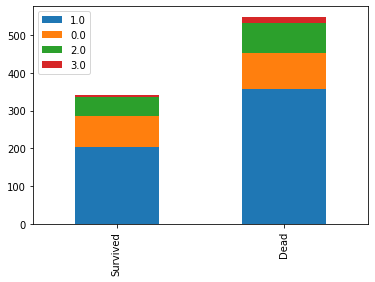

In [7]:
# 4. Age + 결측치제거 
# 가능한한 타당한 이유로 결측치를 다른 값으로 대체해 주어야 한다. 
# -전체사람의 평균을 구해서 결측치를 채운다. 
# -Title을 이용해서 각 title에 맞는 평균 나이로 결측치를 채운다. 
age_mean = train_df.groupby("Title")["Age"].mean()
a = train_df[train_df["Title"]==0]["Age"].fillna(age_mean[0]) #series를 return 받는다
b = train_df[train_df["Title"]==1]["Age"].fillna(age_mean[1])
c = train_df[train_df["Title"]==2]["Age"].fillna(age_mean[2])
d = train_df[train_df["Title"]==3]["Age"].fillna(age_mean[3])
result_series = pd.concat([a,b,c,d])
train_df["Age"]=result_series.sort_index()
display(train_df)

# Age에 대해서 Binning 처리 
# Binning 처리를 할 때 고려해야 할 사항 -> 간격은 어떻게 설정? 
# Age -> 0~20 :0 
# Age -> 20살 초과~40이하 : 1
# Age -> 40살 초과~60이하 : 2
# Age -> 60살초과 : 3
train_df.loc[train_df["Age"] <= 20, "Age"] = 0
train_df.loc[(train_df["Age"] > 20) & (train_df["Age"] <= 40), "Age"] = 1
train_df.loc[(train_df["Age"] > 40) & (train_df["Age"] <= 60), "Age"] = 2
train_df.loc[60 < train_df["Age"] , "Age"] = 3

stackedBarChart("Age") # 20대~40대 인원들이 가장 많이 죽음(원래 구성비율자체가 높음)
display(train_df) # 이 셀만 다시 실행하면 다 꼬인다!! 재실행시 유의할 것
                  # 운임요금(Fare) 를 마지막 binning 처리 대상으로! 

512.3292
0.0
7.9104
14.4542
31.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0.0,0,0
1,1,1,1,1.0,1,0,3.0,2,2
2,1,3,1,1.0,0,0,1.0,0,1
3,1,1,1,1.0,1,0,3.0,0,2
4,0,3,0,1.0,0,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,1.0,0,3
887,1,1,1,0.0,0,0,2.0,0,1
888,0,3,1,1.0,1,2,2.0,0,1
889,1,1,0,1.0,0,0,2.0,2,0


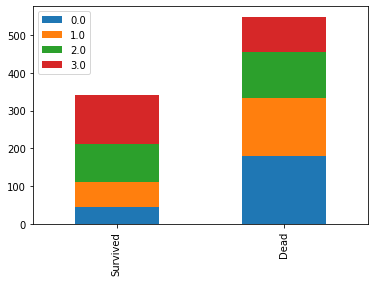

In [8]:
# 5. Fare 
# 여기에 이상치 처리까지하면 모든 전처리가 끝(아마도)
import numpy as np 

print(max(train_df["Fare"])) #512.3292
print(min(train_df["Fare"])) #0.0
print(np.percentile((train_df["Fare"]), 25)) #7.9104
print(np.percentile((train_df["Fare"]), 50)) #14.4542
print(np.percentile((train_df["Fare"]), 75)) #31.0

train_df.loc[train_df["Fare"] <= 7.9104, "Fare"] = 0
train_df.loc[(train_df["Fare"] > 7.9104) & (train_df["Fare"] <= 14.4542), "Fare"] = 1
train_df.loc[(train_df["Fare"] > 14.4542) & (train_df["Fare"] <= 31.0), "Fare"] = 2
train_df.loc[31.0 < train_df["Fare"] , "Fare"] = 3

display(train_df)
stackedBarChart("Fare")

In [13]:
## Machine Learning

train_df.shape
train_num = int(train_df.shape[0] * 0.8) #712

#train, test data set 
train_x_data = train_df.drop("Survived", axis = 1, inplace = False)[:train_num]                                                               
test_x_data = train_df.drop("Survived", axis=1, inplace=False)[train_num:] 

# y축은 Survived 하나 
# 2차원 형태로 바꾸어주어야 한다.
train_y_data = train_df["Survived"][:train_num].values.reshape([-1,1]) 
test_y_data = train_df["Survived"][train_num:].values.reshape([-1,1])


In [19]:
# 그래프 초기화 
tf.reset_default_graph()

# Placeholder 
X = tf.placeholder(shape=[None, 8], dtype = tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype = tf.float32)
keep_rate =tf.placeholder(dtype=tf.float32)

# Weight & bias( Deep & Wide ) 
W1 = tf.get_variable("Weight1", shape=[8, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")        
_layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)
layer1 = tf.nn.dropout(_layer1, keep_prob = keep_rate ) #'죽이는 비율'설정 -> 과적합 방지 (학습시 수치 설정)
                                                  # test data로 검사결과(정확도)뽑을 때는 당연 빼야한다 
W2 = tf.get_variable("Weight2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")      
_layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)
layer2 = tf.nn.dropout(_layer2, keep_prob = keep_rate )

W3 = tf.get_variable("Weight3", shape=[256, 1], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([1]), name = "bias3")      
_layer3 = tf.nn.relu(tf.matmul(layer2,W2) + b2)
layer3 = tf.nn.dropout(_layer3, keep_prob = keep_rate )


# Hypothesis 
logit = tf.matmul(layer2,W3) + b3 
H = tf.nn.relu(logit) #or tf.sigmoid()

# cost
# softmax가 아니라 sigmoid로 (자료자체가 multinomial이 아니니)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                              labels = Y))

# train 
# AdamOptimizer 사용해보기 
train = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)
#train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
train_epoch = 300
batch_size = 100

# 모든 데이터 불러오지 않고, 몇개씩 불러들어서 학습

for step in range(train_epoch):
    num_of_iter = int(train_num / batch_size)     # train이 도대체 몇개 행이 있는지 / batch_size
    cost_val = 0
    
    for i in range(num_of_iter):
        batch_x=train_x_data[i*batch_size:(i+1)*batch_size]
        batch_y=train_y_data[i*batch_size:(i+1)*batch_size]
        _,cost_val = sess.run([train,cost],
                             feed_dict={X:batch_x,
                                        Y:batch_y,
                                        keep_rate:0.7})
    if step % 30 ==0:
        print("Cost값은: {}".format(cost_val))


Cost값은: 0.7194892168045044
Cost값은: 0.4562467336654663
Cost값은: 0.40579813718795776
Cost값은: 0.39700639247894287
Cost값은: 0.37047410011291504
Cost값은: 0.36470451951026917
Cost값은: 0.3675640821456909
Cost값은: 0.35481590032577515
Cost값은: 0.34795764088630676
Cost값은: 0.3452722430229187


In [20]:
# 정확도 측정 
# 테스트용 입력 데이터를(test_x_data) 넣어서 예측한다 .
# 이렇게 구한 예측값과 y입력데이터(test_y_data)를 비교한다. 
predict = tf.cast(H > 0.5, dtype = tf.float32) # 이론의 0.5가 넘으면 산것으로 간주 
                                               # T, F 를 실수값으로 casting
                                               # 확률을 0 과 1로 분류한다. 
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32)) 
print("정확도 : {}.".format(sess.run(accuracy, feed_dict={ X: test_x_data,
                                                           Y: test_y_data,
                                                          keep_rate : 1.0})))


정확도 : 0.8659217953681946.


#################################################################################

In [21]:
## test.csv를 이용해서 prediction 을 해야 한다. 
## 예측결과가 나온다! -> 파일로 만들어서 제출 

# data loading(train data set loading)
test_df = pd.read_csv("./data/titanic/test.csv")


# Feature Engineering
# Feature : Column 
test_df.head()

test_df["Title"]= test_df["Name"].str.extract("([A-Za-z]+)\.") 
test_df["Title"].value_counts() 
title_mapping_dict = {"Mr" : 0, "Miss":1, "Mrs":2,
                      "Master" :3, "Dr" :3, "Rev" :3,
                      "Col" :3, "Major" :3, "Mlle" :3,
                      "Don" :3, "Dona" :3, "Jonkheer" :3, 
                      "Countess" :3, "Lady" :3, "Mme" :3,
                      "Ms" :3, "Sir" :3, "Capt" :3} 
test_df["Title"]=test_df["Title"].map(title_mapping_dict) #Dona 추가 

#제거할 건 제거하자(안쓸 col들 제거)
test_df.drop("Name", axis=1, inplace=True)
test_df.drop("Ticket", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("PassengerId", axis=1, inplace=True)
#test_df.drop("Embarked", axis=1, inplace=True)
# 성별 col에 대해 male=0, female=1로 수정해보자 
sex_mapping_dict = {'male': 0, 'female':1}
test_df["Sex"]=test_df["Sex"].map(sex_mapping_dict)


# 탑승지역 col에 대해서 S->0, Q->1, C->2로 변환 
test_df["Embarked"].fillna("S", inplace=True)
embarked_mapping_dict = {'S': 0, 'Q': 1, 'C': 2} 
test_df["Embarked"]=test_df["Embarked"].map(embarked_mapping_dict)


# Age처리 
# -Title을 이용해서 각 title에 맞는 평균 나이로 결측치를 채운다. 
age_mean = test_df.groupby("Title")["Age"].mean()
a = test_df[test_df["Title"]==0]["Age"].fillna(age_mean[0]) #series를 return 받는다
b = test_df[test_df["Title"]==1]["Age"].fillna(age_mean[1])
c = test_df[test_df["Title"]==2]["Age"].fillna(age_mean[2])
d = test_df[test_df["Title"]==3]["Age"].fillna(age_mean[3])
result_series = pd.concat([a,b,c,d])
test_df["Age"]=result_series.sort_index()

# Age에 대해서 Binning 처리 
test_df.loc[test_df["Age"] <= 20, "Age"] = 0
test_df.loc[(test_df["Age"] > 20) & (test_df["Age"] <= 40), "Age"] = 1
test_df.loc[(test_df["Age"] > 40) & (test_df["Age"] <= 60), "Age"] = 2
test_df.loc[60 < test_df["Age"] , "Age"] = 3

 
    
# Fare처리
'''
print(max(train_df["Fare"])) #512.3292
print(min(train_df["Fare"])) #0.0
print(np.percentile((train_df["Fare"]), 25)) #7.9104
print(np.percentile((train_df["Fare"]), 50)) #14.4542
print(np.percentile((train_df["Fare"]), 75)) #31.0
'''
test_df["Fare"]=test_df["Fare"].fillna(0)
test_df.loc[test_df["Fare"] <= 7.9104, "Fare"] = 0
test_df.loc[(test_df["Fare"] > 7.9104) & (test_df["Fare"] <= 14.4542), "Fare"] = 1
test_df.loc[(test_df["Fare"] > 14.4542) & (test_df["Fare"] <= 31.0), "Fare"] = 2
test_df.loc[31.0 < test_df["Fare"] , "Fare"] = 3


display(test_df)
#######################################################################
# 그래프 초기화 
tf.reset_default_graph()

# Placeholder 
X = tf.placeholder(shape=[None, 8], dtype = tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype = tf.float32)
keep_rate1 =tf.placeholder(dtype=tf.float32)

# Weight & bias( Deep & Wide ) 
W1 = tf.get_variable("Weight1", shape=[8, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")        
_layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)
layer1 = tf.nn.dropout(_layer1, keep_prob = keep_rate1 ) #'죽이는 비율'설정 -> 과적합 방지 (학습시 수치 설정)
                                                  # test data로 검사결과(정확도)뽑을 때는 당연 빼야한다 
W2 = tf.get_variable("Weight2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")      
_layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)
layer2 = tf.nn.dropout(_layer2, keep_prob = keep_rate1 )

W3 = tf.get_variable("Weight3", shape=[256, 1], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([1]), name = "bias3")      
_layer3 = tf.nn.relu(tf.matmul(layer2,W2) + b2)
layer3 = tf.nn.dropout(_layer3, keep_prob = keep_rate1 )


# Hypothesis 
logit = tf.matmul(layer2,W3) + b3 
H = tf.nn.relu(logit) #or tf.sigmoid()

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                              labels = Y))
# train 
# AdamOptimizer 사용해보기 
train = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(cost)
#train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
train_epoch = 30
batch_size = 100

# 모든 데이터 불러오지 않고, 몇개씩 불러들어서 학습

for step in range(train_epoch):
    num_of_iter = int(train_num / batch_size)     # train이 도대체 몇개 행이 있는지 / batch_size
    cost_val = 0
    
    for i in range(num_of_iter):
        batch_x=train_x_data[i*batch_size:(i+1)*batch_size]
        batch_y=train_y_data[i*batch_size:(i+1)*batch_size]
        _,cost_val = sess.run([train,cost],
                             feed_dict={X:batch_x,
                                        Y:batch_y,
                                        keep_rate1:0.7})
    if step % 3 ==0:
        print("Cost값은: {}".format(cost_val))


#예측
result = sess.run(H, feed_dict={X : test_df,
                                keep_rate1:1.0})
predict = tf.cast(result > 0.5, dtype = tf.int64)
print(sess.run(predict))

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,1.0,0,0,0.0,1,0
1,3,1,2.0,1,0,0.0,0,2
2,2,0,3.0,0,0,1.0,1,0
3,3,0,1.0,0,0,1.0,0,0
4,3,1,1.0,1,1,1.0,0,2
...,...,...,...,...,...,...,...,...
413,3,0,1.0,0,0,1.0,0,0
414,1,1,1.0,0,0,3.0,2,3
415,3,0,1.0,0,0,0.0,0,0
416,3,0,1.0,0,0,1.0,0,0


Cost값은: 0.6023808717727661
Cost값은: 0.4100385904312134
Cost값은: 0.4530911147594452
Cost값은: 0.38591331243515015
Cost값은: 0.4221797585487366
Cost값은: 0.4088541269302368
Cost값은: 0.3896907567977905
Cost값은: 0.417694091796875
Cost값은: 0.3917825222015381
Cost값은: 0.361326664686203
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 

In [22]:
#결과 제출용 파일 생성 

#test_df.isnull().sum()
#결과 제출용 파일 생성 

result_df = pd.DataFrame(sess.run(predict))
result_df.rename(columns={0:"Survived"}, inplace = True)
display(result_df)


df = pd.read_csv("./data/titanic/gender_submission.csv")
submit_df= df["PassengerId"]
submit_df = pd.DataFrame(submit_df)
display(submit_df)


submit_df = pd.concat([submit_df, result_df], axis= 1)
display(submit_df)

submit_df.to_csv("./data/titanic/result.csv", index=False)

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
